# UEFA Champions League Statistics(1993-2020) Analysis
I am a football fan as well as a Business Intelligence Analyst or Data Analyst enthusiast. So I collected all the statistics of UCL from 1993-2020 and tried to use some data science tools to knaow which team dominated last 27 years and many other things.

# Content
 year: 2nd year of a season. example: 1993 represent 1992-1993 season.
 teamname: Team Name matchplayed: Total match played in a season
 wins: Total wins in a season
 draws: Total draws in a season
 losts: Total losts in a season
 goalsscored: Number of goals the team scored in a season goalsconceded: Number of goals conceded in a season
 : goal difference(goalsscored - goalsconceded)
 group_points: Points obtained in the group stage in a season.
 champions: Weather a team was champion or not in a season. 1 = champion, 0 = not champion



# Import Basic Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Import Dataset

In [2]:
df=pd.read_csv("ucl_stats.csv")
df

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
709,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,2020,Valencia,8,3,2,3,13,15,-2,11,0
711,2020,Chelsea,8,3,2,3,12,16,-4,11,0
712,2020,Ajax,6,3,1,2,12,6,6,10,0


# Understand About Dataset

In [3]:
#to see first 5 rows
df.head(5)

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0


In [4]:
#to see last 5 rows
df.tail(5)

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
709,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,2020,Valencia,8,3,2,3,13,15,-2,11,0
711,2020,Chelsea,8,3,2,3,12,16,-4,11,0
712,2020,Ajax,6,3,1,2,12,6,6,10,0
713,2020,Lille,6,0,1,5,4,14,-10,1,0


In [5]:
#to see 5 random rows
df.sample(5)

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
385,2010,Barcelona,12,6,4,2,20,10,10,11,0
493,2014,Bayer Leverkusen,8,3,1,4,10,16,-6,10,0
89,1999,Ajax,6,2,1,3,4,6,-2,7,0
132,2001,Paris Saint-Germain,6,1,2,3,8,10,-2,5,0
460,2013,Paris Saint-Germain,10,6,3,1,20,8,12,15,0


In [6]:
#to see dataset shape
df.shape

(714, 11)

In [7]:
#to see columns name
df.columns

Index(['year', 'team', 'match_played', 'wins', 'draws', 'losts',
       'goals_scored', 'goals_conceded', 'gd', 'group_point', 'champions'],
      dtype='object')

In [9]:
#to see columns lengl
len(df.columns)

11

In [10]:
#to see data type 
df.dtypes

year               int64
team              object
match_played       int64
wins               int64
draws              int64
losts              int64
goals_scored       int64
goals_conceded     int64
gd                 int64
group_point        int64
champions          int64
dtype: object

In [11]:
#to see data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            714 non-null    int64 
 1   team            714 non-null    object
 2   match_played    714 non-null    int64 
 3   wins            714 non-null    int64 
 4   draws           714 non-null    int64 
 5   losts           714 non-null    int64 
 6   goals_scored    714 non-null    int64 
 7   goals_conceded  714 non-null    int64 
 8   gd              714 non-null    int64 
 9   group_point     714 non-null    int64 
 10  champions       714 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 61.5+ KB


In [12]:
#to see basic descriptive statistics
df.describe()

,year,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2008.711485,7.673669,2.939776,1.844538,2.892157,10.582633,10.443978,0.198880,8.183473,0.039216
std,7.340121,2.100880,2.316600,1.273169,1.234552,6.979194,3.634080,7.573646,4.192922,0.194244
min,1993.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-22.000000,-8.000000,0.000000
25%,2004.000000,6.000000,1.000000,1.000000,2.000000,5.000000,8.000000,-5.000000,5.000000,0.000000
50%,2009.000000,6.000000,2.000000,2.000000,3.000000,9.000000,10.000000,0.000000,8.000000,0.000000
75%,2015.000000,8.000000,4.000000,3.000000,4.000000,14.000000,13.000000,5.000000,11.000000,0.000000
max,2020.000000,13.000000,11.000000,7.000000,6.000000,43.000000,24.000000,35.000000,18.000000,1.000000


# Data Cleaning

In [14]:
#to see duplicated value
df[df.duplicated()]

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions


Great! We dont have any duplicated values

In [18]:
#to see null values
df.isna().sum()

year              0
team              0
match_played      0
wins              0
draws             0
losts             0
goals_scored      0
goals_conceded    0
gd                0
group_point       0
champions         0
dtype: int64

In [20]:
#percentage of missing data 
per_mis=df.isna().sum()/len(df.columns)
per_mis

year              0.0
team              0.0
match_played      0.0
wins              0.0
draws             0.0
losts             0.0
goals_scored      0.0
goals_conceded    0.0
gd                0.0
group_point       0.0
champions         0.0
dtype: float64

<AxesSubplot:>

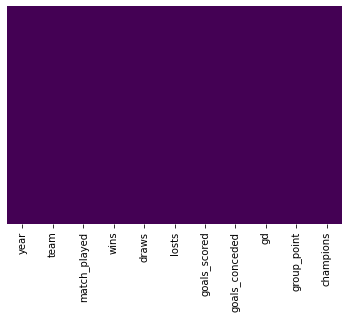

In [22]:
#missing Value Heating map
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! We Have do not any missing Value

In [24]:
#change datatype
df.dtypes
df['year']=pd.to_datetime(df['year'])

In [25]:
#check dt type
df.dtypes

year              datetime64[ns]
team                      object
match_played               int64
wins                       int64
draws                      int64
losts                      int64
goals_scored               int64
goals_conceded             int64
gd                         int64
group_point                int64
champions                  int64
dtype: object

Great! Our Data set is Clean and ready to Exploratory Data Analysis

# Exploratory Data Analysis

In [29]:
#Let's check which team was champion for how many times!

champion=df.team[df.champions==1].value_counts()
champion

Real Madrid          7
Barcelona            4
Milan                3
Bayern Munich        3
Manchester United    2
Liverpool            2
Marseille            1
Ajax                 1
Juventus             1
Borussia Dortmund    1
Porto                1
Internazionale       1
Chelsea              1
Name: team, dtype: int64

Text(0, 0.5, 'Number Of UCL Tropy')

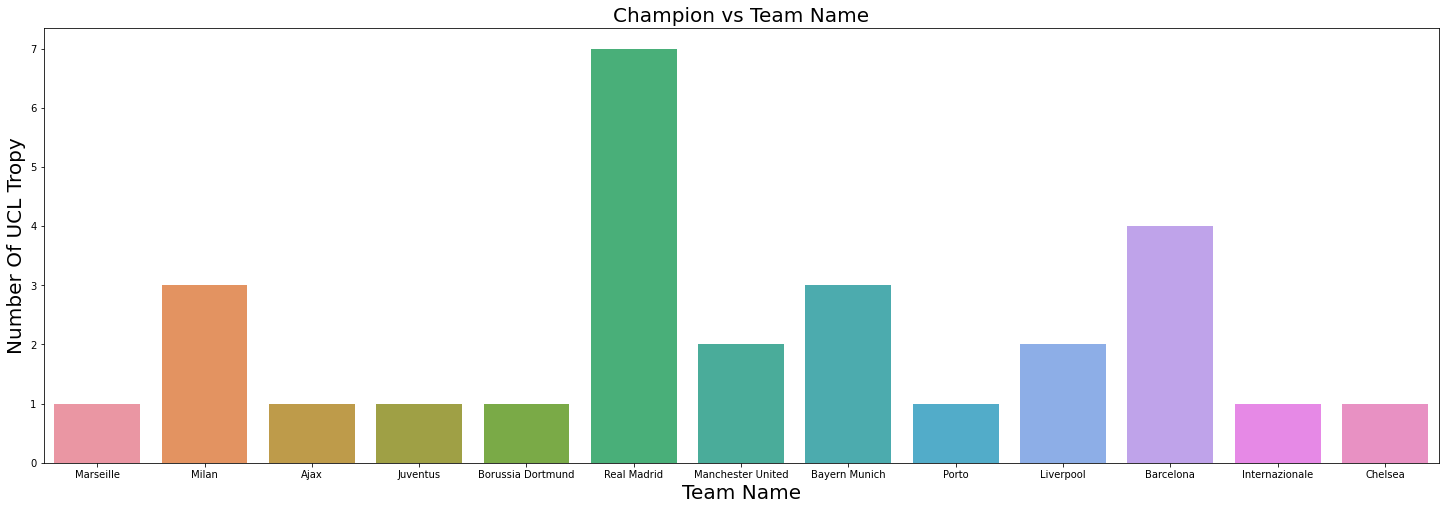

In [37]:
#visulize
plt.figure(figsize=(25,8))
sns.countplot(x = df.team[df.champions == 1],data=df)
plt.title("Champion vs Team Name",fontsize=20)
plt.xlabel("Team Name",fontsize=20)
plt.ylabel("Number Of UCL Tropy",fontsize=20)

In [41]:
#creating a list of these teams
teams = ['Real Madrid', 'Barcelona', 'Milan', 'Manchester United', 'Paris Saint-Germain', 'Bayern Munich', 'Ajax', 'Juventus', 'Chelsea', 'Liverpool']

In [42]:
#function to create new dataframe with specific team name
def create_team_data(data,name):
    return data[data.team==name]

In [51]:
#Real Madrids total stats.
madrid=create_team_data(df,'Real Madrid').drop('year',axis=1)
madrid.sum(numeric_only=True)

match_played      243
wins              145
draws              45
losts              53
goals_scored      509
goals_conceded    266
gd                241
group_point       310
champions           7
dtype: int64

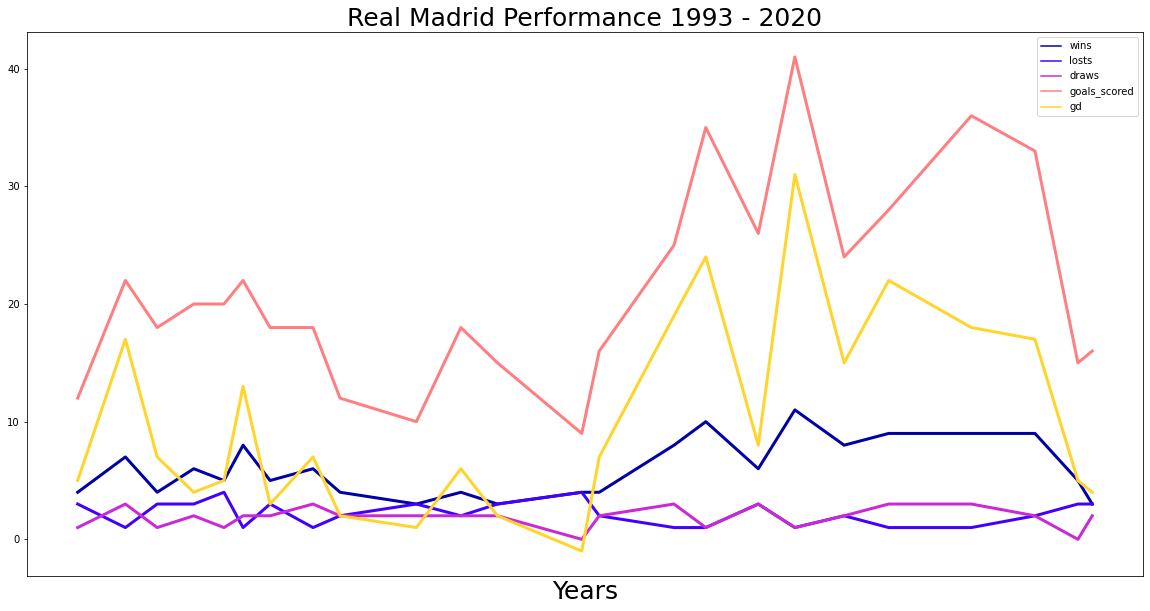

In [71]:
#Visulize Real Madrid Performance Stats
plt.figure(figsize=(20,10))
sns.lineplot(data=madrid[['wins','losts','draws','goals_scored','gd']],linewidth=3,palette='gnuplot2',dashes=False)
plt.title("Real Madrid Performance 1993 - 2020",fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.xticks([]);

In [64]:
#Barcelona total stats.
barcelona=create_team_data(df,'Barcelona').drop('year',axis=1)
barcelona.sum(numeric_only=True)

match_played      227
wins              136
draws              57
losts              40
goals_scored      458
goals_conceded    226
gd                232
group_point       287
champions           4
dtype: int64

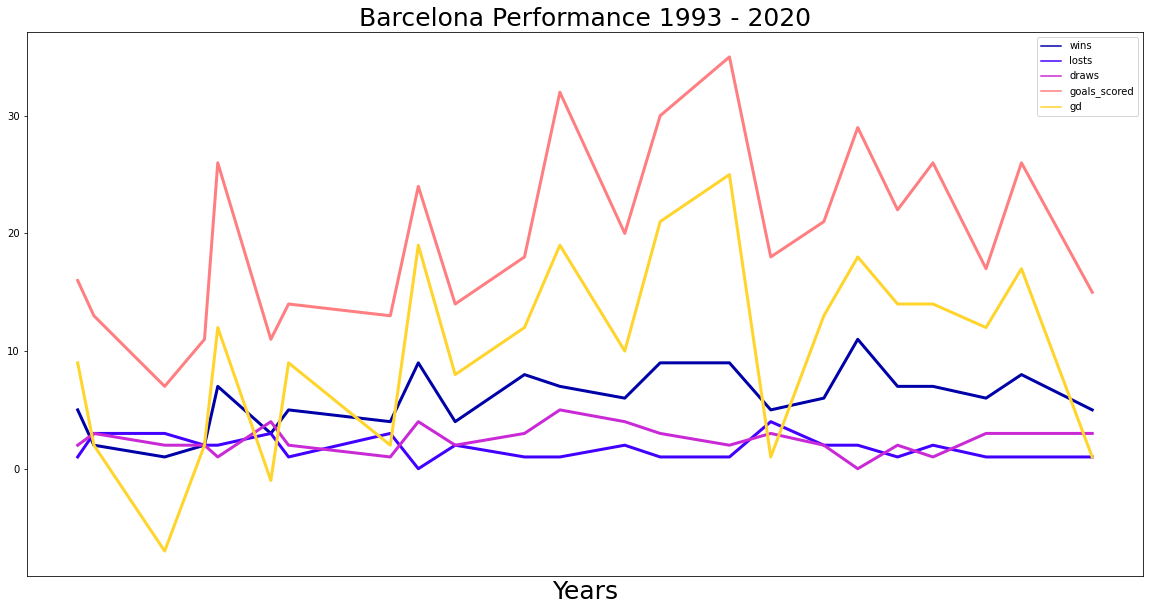

In [72]:
#Visulize Real Madrid Performance Stats
plt.figure(figsize=(20,10))
sns.lineplot(data=barcelona[['wins','losts','draws','goals_scored','gd']],linewidth=3,palette='gnuplot2',dashes=False)
plt.title("Barcelona Performance 1993 - 2020",fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.xticks([]);

In [66]:
#Bayern Munichs total stats.
bayern = create_team_data(df, 'Bayern Munich').drop('year', axis = 1)
bayern.sum(numeric_only = True)

match_played      227
wins              133
draws              43
losts              51
goals_scored      463
goals_conceded    233
gd                225
group_point       280
champions           3
dtype: int64

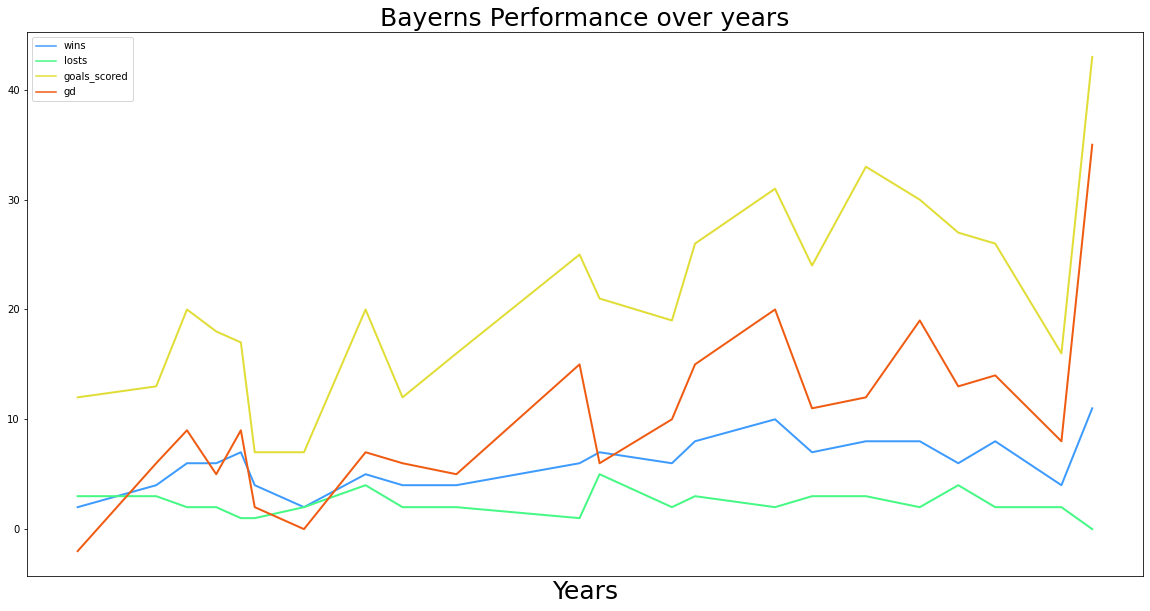

In [73]:
plt.figure(figsize=(20,10))
sns.lineplot(data = bayern[['wins', 'losts', 'goals_scored', 'gd']], palette='turbo', linewidth=2, dashes = False)
plt.title("Bayerns Performance over years",fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.xticks([]);

In [74]:
#Liverpools total stats.
liverpool = create_team_data(df, 'Liverpool').drop('year', axis = 1)
liverpool.sum(numeric_only = True)

match_played      110
wins               55
draws              27
losts              28
goals_scored      190
goals_conceded    112
gd                 77
group_point       112
champions           2
dtype: int64

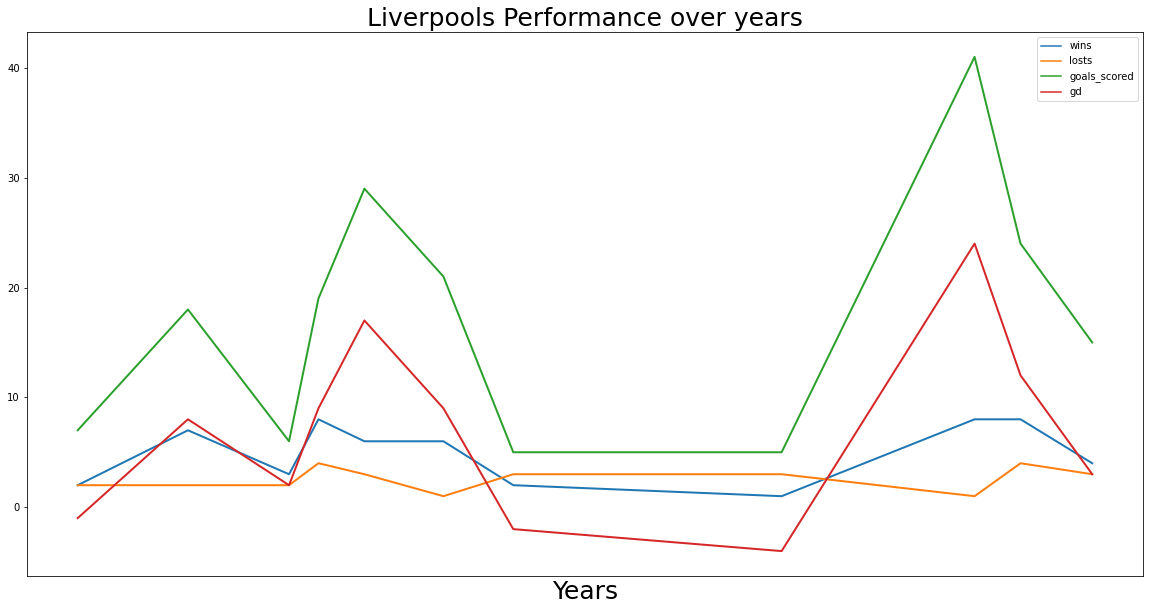

In [75]:
plt.figure(figsize=(20,10))
sns.lineplot(data = liverpool[['wins', 'losts', 'goals_scored', 'gd']], linewidth=2, dashes = False)
plt.title("Liverpools Performance over years",fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.xticks([]);


In [76]:
#Manchester Citys total stats.
mancity = create_team_data(df, 'Manchester City').drop('year', axis = 1)
mancity.sum(numeric_only = True)

match_played       77
wins               38
draws              15
losts              24
goals_scored      152
goals_conceded    103
gd                 49
group_point        99
champions           0
dtype: int64

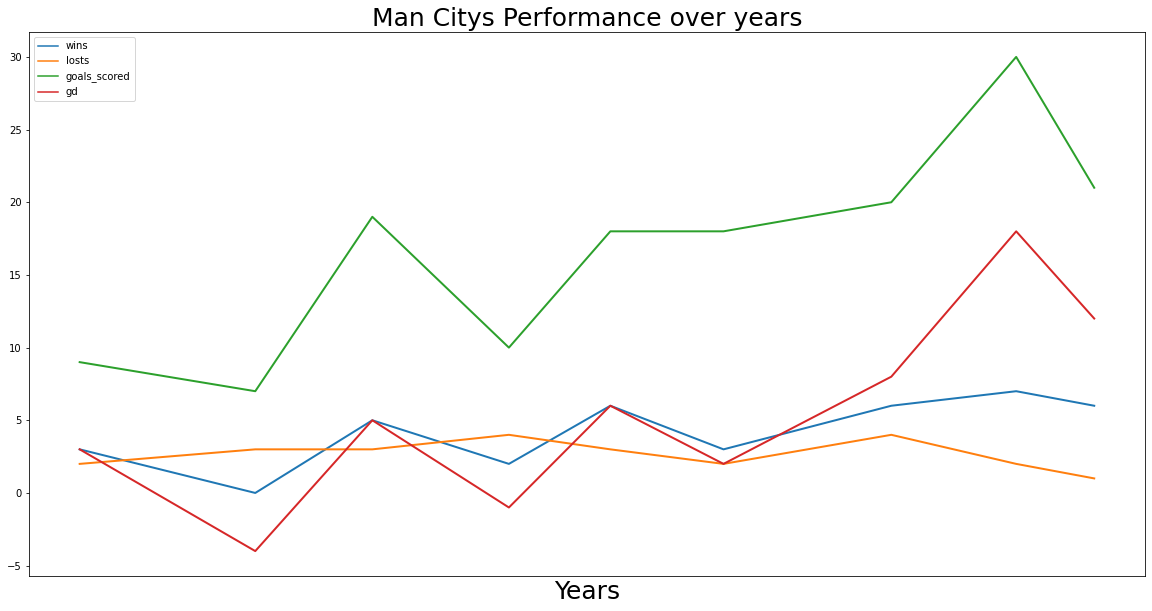

In [77]:
plt.figure(figsize=(20,10))
sns.lineplot(data = mancity[['wins', 'losts', 'goals_scored', 'gd']], linewidth=2, dashes = False)
plt.title("Man Citys Performance over years",fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.xticks([]);

In [78]:
#Juventuses total stats.
juve = create_team_data(df, 'Juventus').drop('year', axis = 1)
juve.sum(numeric_only = True)

match_played      170
wins               87
draws              39
losts              43
goals_scored      264
goals_conceded    161
gd                100
group_point       211
champions           1
dtype: int64

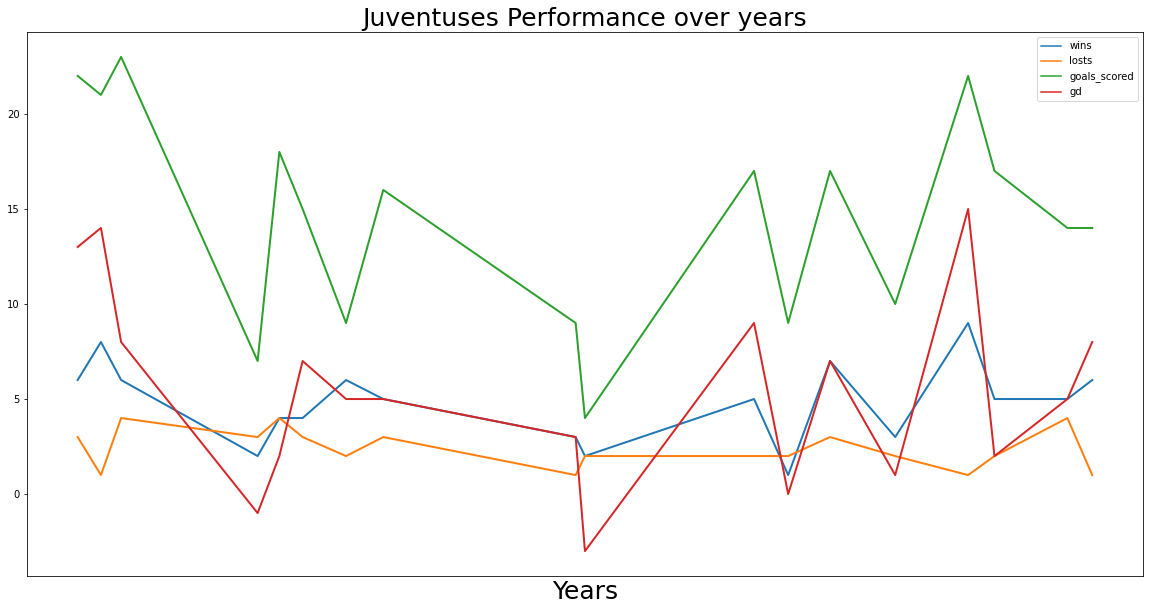

In [79]:
plt.figure(figsize=(20,10))
sns.lineplot(data = juve[['wins', 'losts', 'goals_scored', 'gd']], linewidth=2, dashes = False)
plt.title("Juventuses Performance over years",fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.xticks([]);

In [80]:
#PSGs total stats.
psg = create_team_data(df, 'Paris Saint-Germain').drop('year', axis = 1)
psg.sum(numeric_only = True)

match_played      103
wins               57
draws              20
losts              25
goals_scored      204
goals_conceded    111
gd                 95
group_point       142
champions           0
dtype: int64

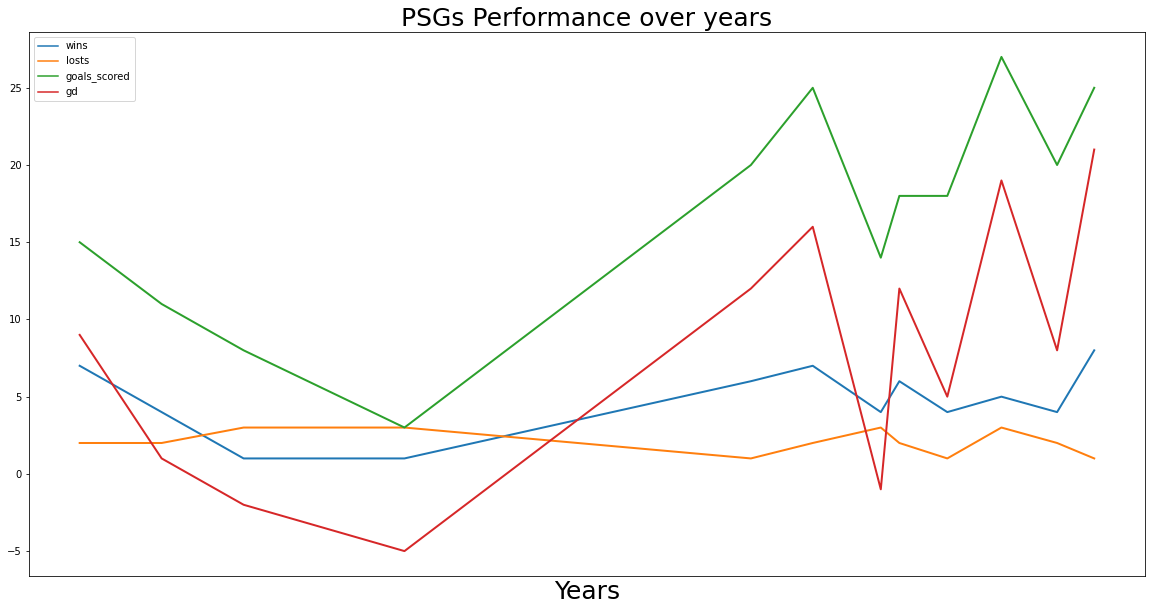

In [83]:
plt.figure(figsize=(20,10))
sns.lineplot(data = psg[['wins', 'losts', 'goals_scored', 'gd']], linewidth=2, dashes = False)
plt.title("PSGs Performance over years",fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.xticks([]);

# Compairning Stats Among top teams

In [95]:
#function that will return a dataframe with specific feature values that will help us visualizing the comparison among these teams.
def new_data(data, team_list, drop_list):
    df_dict = {}
    for team in team_list:
        values = data[data.team == team].drop(drop_list, axis = 1).sum()
        df_dict[team] = values
    return pd.DataFrame(df_dict).T

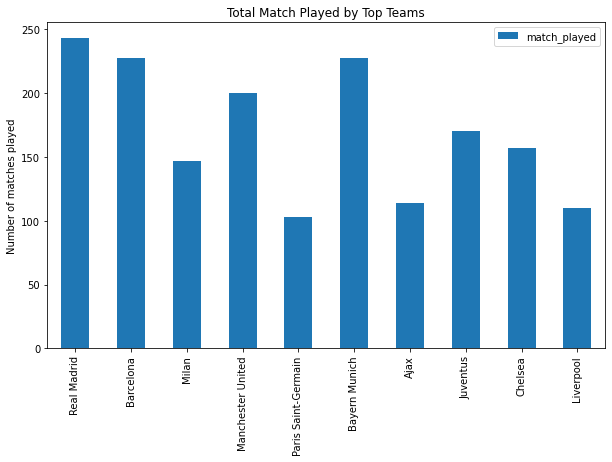

In [97]:
#comparing total matches top teams played.
total_matches = new_data(df, teams, ['year', 'team', 'wins', 'draws', 'losts', 'goals_conceded', 'goals_scored', 'gd', 'group_point', 'champions'])
total_matches.plot(kind = 'bar', figsize = (10, 6), colormap = 'tab10')
plt.title("Total Match Played by Top Teams")
plt.ylabel('Number of matches played');

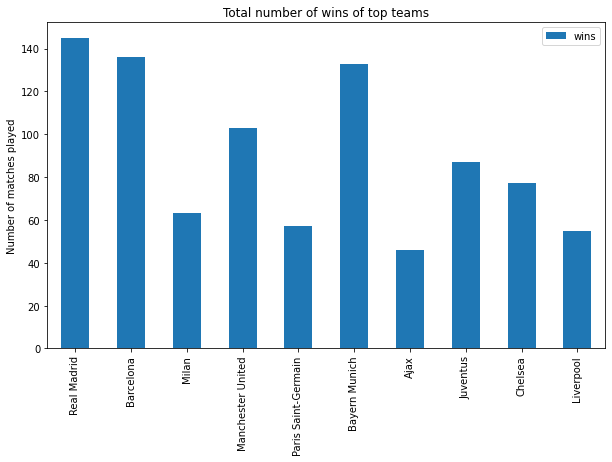

In [101]:
#comparing total wins top teams played.
total_matches = new_data(df, teams, ['year', 'team', 'match_played', 'draws', 'losts', 'goals_conceded', 'goals_scored', 'gd', 'group_point', 'champions'])
total_matches.plot(kind = 'bar', figsize = (10, 6), colormap = 'tab10')
plt.title("Total number of wins of top teams")
plt.ylabel('Number of matches played');

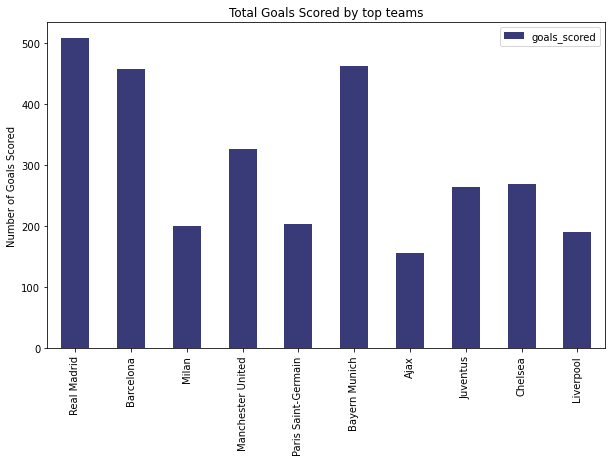

In [102]:
#comparing total goals scored among top teams
gs = new_data(df, teams, ['year', 'team', 'match_played', 'draws', 'wins', 'goals_conceded', 'losts', 'gd', 'group_point', 'champions'])
gs.plot(kind = 'bar', figsize = (10, 6), colormap = 'tab20b')
plt.title("Total Goals Scored by top teams")
plt.ylabel('Number of Goals Scored');

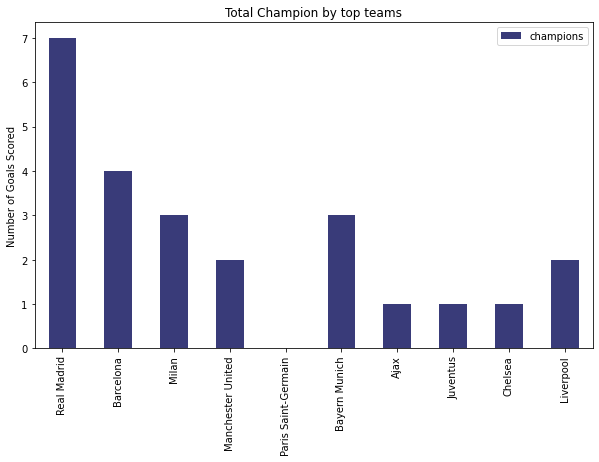

In [104]:
#comparing total champion among top teams
gs = new_data(df, teams, ['year', 'team', 'match_played', 'draws', 'wins', 'goals_conceded', 'losts', 'gd', 'group_point', 'goals_scored'])
gs.plot(kind = 'bar', figsize = (10, 6), colormap = 'tab20b')
plt.title("Total Champion by top teams")
plt.ylabel('Number of Goals Scored');

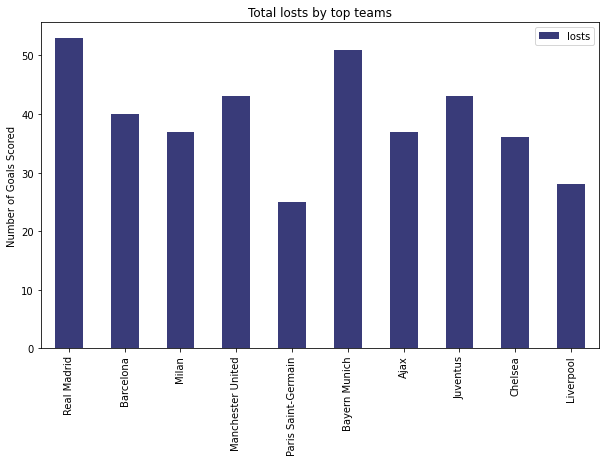

In [106]:
#comparing total losts among top teams
gs = new_data(df, teams, ['year', 'team', 'match_played', 'draws', 'wins', 'goals_conceded', 'champions', 'gd', 'group_point', 'goals_scored'])
gs.plot(kind = 'bar', figsize = (10, 6), colormap = 'tab20b')
plt.title("Total losts by top teams")
plt.ylabel('Number of Goals Scored');

# Comparing between teams

In [118]:
#function to create new dataframe with specific team and its stats
def team_df(data,team_name):
    return data[data.team==team_name]

In [119]:
madrid=team_df(df,'Real Madrid')
barcelona=team_df(df,'Barcelona')
bayern = team_df(df, 'Bayern Munich')
mancity = team_df(df, 'Manchester City')
chelsea = team_df(df, 'Chelsea')
psg = team_df(df, 'Paris Saint-Germain')
liverpool = team_df(df, 'Liverpool')

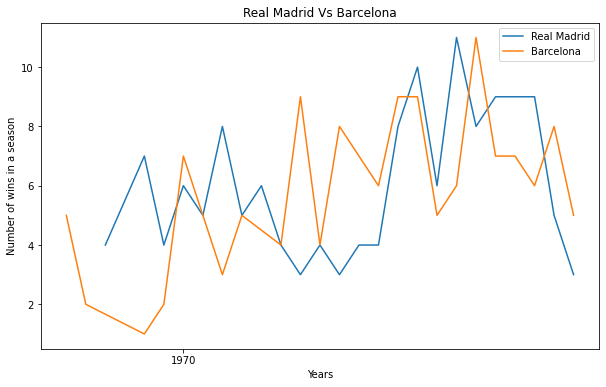

In [126]:
#compare betwwn real madrid and barcelona

plt.figure(figsize=(10,6))
sns.lineplot(x = 'year', y = 'wins', data = madrid)
sns.lineplot(x = 'year', y = 'wins', data = barcelona)
plt.title("Real Madrid Vs Barcelona")
plt.xlabel("Years")
plt.ylabel("Number of wins in a season")
plt.legend(['Real Madrid', 'Barcelona']);

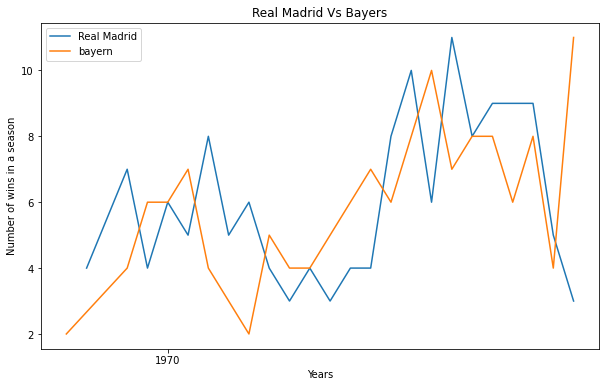

In [125]:
#compare betwwn real madrid and bayern
plt.figure(figsize=(10,6))
sns.lineplot(x = 'year', y = 'wins', data = madrid)
sns.lineplot(x = 'year', y = 'wins', data = bayern)
plt.title("Real Madrid Vs Bayers")
plt.xlabel("Years")
plt.ylabel("Number of wins in a season")
plt.legend(['Real Madrid', 'bayern']);

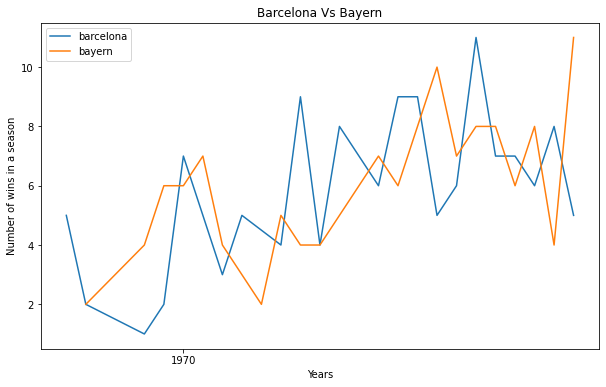

In [124]:
#compare betwwn real madrid and bayern
plt.figure(figsize=(10,6))
sns.lineplot(x = 'year', y = 'wins', data = barcelona)
sns.lineplot(x = 'year', y = 'wins', data = bayern)
plt.title("Barcelona Vs Bayern")
plt.xlabel("Years")
plt.ylabel("Number of wins in a season")
plt.legend(['barcelona', 'bayern']);

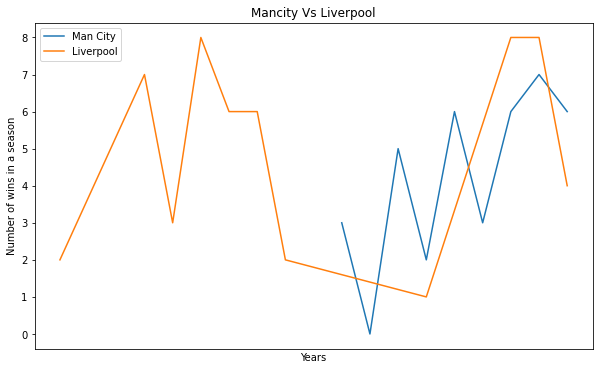

In [127]:
#compare betwwn Manchester  and Liverpool

plt.figure(figsize=(10,6))
sns.lineplot(x = 'year', y = 'wins', data = mancity)
sns.lineplot(x = 'year', y = 'wins', data = liverpool)
plt.title("Mancity Vs Liverpool")
plt.xlabel("Years")
plt.ylabel("Number of wins in a season")
plt.legend(['Man City', 'Liverpool']);